# Classification Assignment


## **Task has been mentioned at the end of this notebook**  

In [165]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [166]:
df1=pd.read_csv('Clean.csv')
df1.shape

(10000, 25)

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   Accomodation_Type        10000 non-null  int64  
 2   Reco_Insurance_Type      10000 non-null  int64  
 3   Is_Spouse                10000 non-null  int64  
 4   Holding_Policy_Duration  10000 non-null  int64  
 5   Reco_Policy_Premium      10000 non-null  float64
 6   Response                 10000 non-null  int64  
 7   X1                       10000 non-null  float64
 8   X2                       10000 non-null  float64
 9   X3                       10000 non-null  float64
 10  X4                       10000 non-null  float64
 11  X5                       10000 non-null  float64
 12  X6                       10000 non-null  float64
 13  X7                       10000 non-null  float64
 14  X8                     

In [169]:
df1.drop('Unnamed: 0',inplace=True,axis=1)

## Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [170]:
df1['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [171]:
from imblearn.under_sampling import RandomUnderSampler

In [172]:
sampler=RandomUnderSampler()

In [173]:
X=df1.drop('Response',axis=1)
y=df1['Response']

In [174]:
print(X.shape,y.shape)

(10000, 23) (10000,)


In [175]:
predicts,response=sampler.fit_resample(X,y)

In [176]:
print(predicts.shape,response.shape)

(4918, 23) (4918,)


In [177]:
response.value_counts()

1    2459
0    2459
Name: Response, dtype: int64

In [178]:
predicts.head()

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,X5,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,1,0,1,15,31257.4,0.0,1.0,0.0,0.0,0.0,...,47.0,1,0,0,0,0,1,0,1,0
1,1,0,1,1,25728.0,1.0,0.0,0.0,0.0,0.0,...,37.0,0,1,0,0,1,0,0,1,0
2,1,1,0,15,14664.0,0.0,0.0,1.0,0.0,0.0,...,61.0,0,0,0,0,1,0,0,1,0
3,1,1,0,7,11502.0,0.0,1.0,0.0,0.0,0.0,...,38.0,0,1,0,0,1,0,0,1,0
4,1,0,1,6,16772.0,0.0,0.0,1.0,0.0,0.0,...,39.5,1,0,0,0,1,0,0,1,0


In [179]:
predicts.shape

(4918, 23)

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
scaler=StandardScaler()
predicts['Age']=scaler.fit_transform(predicts[['Age']])
predicts['Holding_Policy_Duration']=scaler.fit_transform(predicts[['Holding_Policy_Duration']])
predicts['Reco_Policy_Premium']=scaler.fit_transform(predicts[['Reco_Policy_Premium']])

In [182]:
predicts

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,X5,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,1,0,1,0.914523,2.684266,0.0,1.0,0.0,0.0,0.0,...,0.188895,1,0,0,0,0,1,0,1,0
1,1,0,1,-1.560196,1.814669,1.0,0.0,0.0,0.0,0.0,...,-0.400450,0,1,0,0,1,0,0,1,0
2,1,1,0,0.914523,0.074658,0.0,0.0,1.0,0.0,0.0,...,1.013978,0,0,0,0,1,0,0,1,0
3,1,1,0,-0.499602,-0.422622,0.0,1.0,0.0,0.0,0.0,...,-0.341516,0,1,0,0,1,0,0,1,0
4,1,0,1,-0.676368,0.406179,0.0,0.0,1.0,0.0,0.0,...,-0.253114,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,1,1,0,0.737757,1.377779,0.0,0.0,0.0,1.0,0.0,...,1.485454,0,0,0,0,1,0,0,1,0
4914,1,1,0,-0.853133,-0.432373,1.0,0.0,0.0,0.0,0.0,...,-0.577254,0,0,0,0,1,0,0,1,0
4915,0,1,0,0.914523,-1.644593,0.0,1.0,0.0,0.0,0.0,...,-1.225533,0,1,0,0,1,0,0,1,0
4916,0,1,0,-0.499602,-0.068770,1.0,0.0,0.0,0.0,0.0,...,0.306764,0,1,0,0,1,0,1,0,0


## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(predicts,response,test_size=0.2)

In [185]:
print(x_train.shape,x_test.shape)

(3934, 23) (984, 23)


In [186]:
print(y_train.shape,y_test.shape)

(3934,) (984,)


In [187]:
performance_metrics_with_hyperparameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve,auc

In [191]:
h_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':np.linspace(0,1,100)}

In [192]:
rscv=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [193]:
results.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.4545454545454546}

In [194]:
results.best_score_

0.5526644004995493

# Logistic Regression with Hyperparameter

In [195]:
LR_tuned_model=results.best_estimator_
LR_tuned_model.fit(x_train,y_train)
lg_pred=LR_tuned_model.predict(x_test)
y_preds=LR_tuned_model.predict_proba(x_test)[:,1]

In [196]:
confusion_matrix(y_test,lg_pred)

array([[194, 319],
       [116, 355]], dtype=int64)

In [197]:
print(classification_report(y_test,lg_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,lg_pred))
print('Precission : ',precision_score(y_test,lg_pred))
print('Recall : ',recall_score(y_test,lg_pred))
print('f1-score : ',f1_score(y_test,lg_pred))
print('Roc Auc score : ',roc_auc_score(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.63      0.38      0.47       513
           1       0.53      0.75      0.62       471

    accuracy                           0.56       984
   macro avg       0.58      0.57      0.55       984
weighted avg       0.58      0.56      0.54       984


Accuracy is :  0.5579268292682927
Precission :  0.526706231454006
Recall :  0.7537154989384289
f1-score :  0.6200873362445415
Roc Auc score :  0.5659415701319825


In [198]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5948564499240552


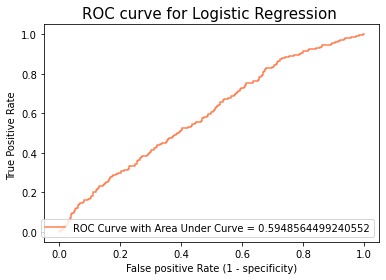

In [199]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [200]:
performance_metrics_with_hyperparameters['Logistic Regression']=[accuracy_score(y_test,lg_pred),
                                                                    precision_score(y_test,lg_pred),
                                                                    recall_score(y_test,lg_pred),
                                                                    f1_score(y_test,lg_pred),
                                                                    auc(fpr, tpr)]

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

In [201]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# SVM 

In [204]:
h_params={'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma':['scale','auto'],'C':np.linspace(0,1,100)}

In [205]:
rscv=RandomizedSearchCV(estimator=SVC(probability=True),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [206]:
results.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'C': 0.23232323232323235}

In [207]:
results.best_score_

0.5597798757743426

# SVM with Hyperparameters

In [208]:
svm_tuned_model=results.best_estimator_
svm_tuned_model.fit(x_train,y_train)
sv_pred=svm_tuned_model.predict(x_test)
y_preds=svm_tuned_model.predict_proba(x_test)[:,1]

In [209]:
confusion_matrix(y_test,sv_pred)

array([[147, 366],
       [ 65, 406]], dtype=int64)

In [210]:
print(classification_report(y_test,sv_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,sv_pred))
print('Precission : ',precision_score(y_test,sv_pred))
print('Recall : ',recall_score(y_test,sv_pred))
print('f1-score : ',f1_score(y_test,sv_pred))
print('Roc Auc score : ',roc_auc_score(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.69      0.29      0.41       513
           1       0.53      0.86      0.65       471

    accuracy                           0.56       984
   macro avg       0.61      0.57      0.53       984
weighted avg       0.61      0.56      0.52       984


Accuracy is :  0.5619918699186992
Precission :  0.5259067357512953
Recall :  0.861995753715499
f1-score :  0.6532582461786002
Roc Auc score :  0.574272730658919


In [211]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5718743662648009


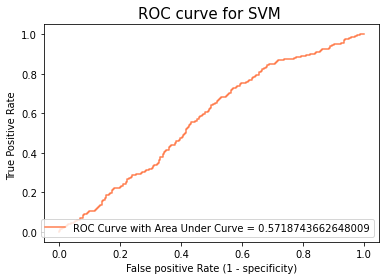

In [212]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [213]:
performance_metrics_with_hyperparameters['SVM']=[accuracy_score(y_test,sv_pred),
                                                                    precision_score(y_test,sv_pred),
                                                                    recall_score(y_test,sv_pred),
                                                                    f1_score(y_test,sv_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [214]:
h_params={'n_neighbors':range(1,11,2),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}

In [215]:
rscv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [216]:
results.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}

In [217]:
results.best_score_

0.5243993416536403

# KNN with hyperparameters

In [218]:
knn_tuned_model=results.best_estimator_
knn_tuned_model.fit(x_train,y_train)
kn_pred=knn_tuned_model.predict(x_test)
y_preds=knn_tuned_model.predict_proba(x_test)[:,1]

In [219]:
confusion_matrix(y_test,kn_pred)

array([[263, 250],
       [219, 252]], dtype=int64)

In [220]:
print(classification_report(y_test,kn_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,kn_pred))
print('Precission : ',precision_score(y_test,kn_pred))
print('Recall : ',recall_score(y_test,kn_pred))
print('f1-score : ',f1_score(y_test,kn_pred))
print('Roc Auc score : ',roc_auc_score(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53       513
           1       0.50      0.54      0.52       471

    accuracy                           0.52       984
   macro avg       0.52      0.52      0.52       984
weighted avg       0.52      0.52      0.52       984


Accuracy is :  0.5233739837398373
Precission :  0.50199203187251
Recall :  0.535031847133758
f1-score :  0.5179856115107914
Roc Auc score :  0.5238512062179511


In [221]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5238698302727803


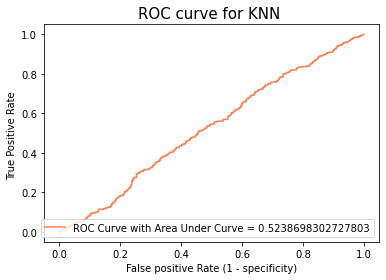

In [222]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [223]:
performance_metrics_with_hyperparameters['KNN']=[accuracy_score(y_test,kn_pred),
                                                                    precision_score(y_test,kn_pred),
                                                                    recall_score(y_test,kn_pred),
                                                                    f1_score(y_test,kn_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [224]:
h_params={'criterion':["gini", "entropy"],
        'splitter':["best", "random"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [225]:
rscv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [226]:
results.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'max_leaf_nodes': 10,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'gini'}

In [227]:
results.best_score_

0.5500192293377664

# Decision Tree  with hyperparameters

In [228]:
dt_tuned_model=results.best_estimator_
dt_tuned_model.fit(x_train,y_train)
dt_pred=dt_tuned_model.predict(x_test)
y_preds=dt_tuned_model.predict_proba(x_test)[:,1]

In [229]:
confusion_matrix(y_test,dt_pred)

array([[230, 283],
       [219, 252]], dtype=int64)

In [230]:
print(classification_report(y_test,dt_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,dt_pred))
print('Precission : ',precision_score(y_test,dt_pred))
print('Recall : ',recall_score(y_test,dt_pred))
print('f1-score : ',f1_score(y_test,dt_pred))
print('Roc Auc score : ',roc_auc_score(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.51      0.45      0.48       513
           1       0.47      0.54      0.50       471

    accuracy                           0.49       984
   macro avg       0.49      0.49      0.49       984
weighted avg       0.49      0.49      0.49       984


Accuracy is :  0.4898373983739837
Precission :  0.47102803738317756
Recall :  0.535031847133758
f1-score :  0.5009940357852882
Roc Auc score :  0.4916874635278926


In [231]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.497036705942729


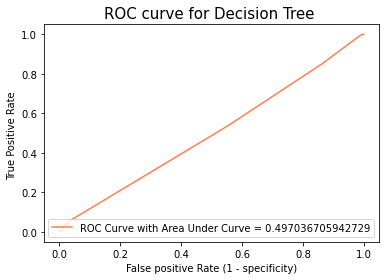

In [232]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [233]:
performance_metrics_with_hyperparameters['Decision Tree']=[accuracy_score(y_test,dt_pred),
                                                                    precision_score(y_test,dt_pred),
                                                                    recall_score(y_test,dt_pred),
                                                                    f1_score(y_test,dt_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [234]:
h_params={'n_estimators':[10,20,30,50,100,150,200],
        'criterion':["gini", "entropy"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [235]:
rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [236]:
results.best_params_

{'n_estimators': 20,
 'min_samples_split': 50,
 'max_leaf_nodes': 20,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy'}

In [237]:
results.best_score_

0.5646604057597037

# Random Forest with hyperparameters

In [238]:
rf_tuned_model=results.best_estimator_
rf_tuned_model.fit(x_train,y_train)
rf_pred=rf_tuned_model.predict(x_test)
y_preds=rf_tuned_model.predict_proba(x_test)[:,1]

In [239]:
confusion_matrix(y_test,rf_pred)

array([[236, 277],
       [129, 342]], dtype=int64)

In [240]:
print(classification_report(y_test,rf_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,rf_pred))
print('Precission : ',precision_score(y_test,rf_pred))
print('Recall : ',recall_score(y_test,rf_pred))
print('f1-score : ',f1_score(y_test,rf_pred))
print('Roc Auc score : ',roc_auc_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       513
           1       0.55      0.73      0.63       471

    accuracy                           0.59       984
   macro avg       0.60      0.59      0.58       984
weighted avg       0.60      0.59      0.58       984


Accuracy is :  0.5873983739837398
Precission :  0.5525040387722132
Recall :  0.7261146496815286
f1-score :  0.6275229357798164
Roc Auc score :  0.5930768180181522


In [241]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6060867549860733


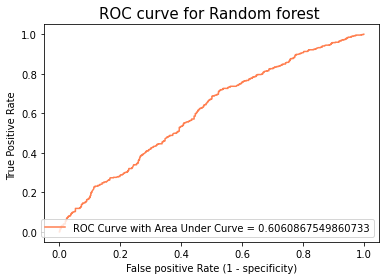

In [242]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [243]:
performance_metrics_with_hyperparameters['Random Forest']=[accuracy_score(y_test,rf_pred),
                                                                    precision_score(y_test,rf_pred),
                                                                    recall_score(y_test,rf_pred),
                                                                    f1_score(y_test,rf_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [244]:
h_params={'n_estimators':[10,20,30,50,70],
        'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':[1,3,5,7,10,15,20],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60]}

In [245]:
rscv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [246]:
results.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'mse'}

In [247]:
results.best_score_

0.5701508986096983

# Gradient Boosting with Hyperparameters

In [248]:
gd_tuned_model=results.best_estimator_
gd_tuned_model.fit(x_train,y_train)
gb_pred=gd_tuned_model.predict(x_test)
y_preds=gd_tuned_model.predict_proba(x_test)[:,1]

In [249]:
confusion_matrix(y_test,gb_pred)

array([[204, 309],
       [127, 344]], dtype=int64)

In [250]:
print(classification_report(y_test,gb_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,gb_pred))
print('Precission : ',precision_score(y_test,gb_pred))
print('Recall : ',recall_score(y_test,gb_pred))
print('f1-score : ',f1_score(y_test,gb_pred))
print('Roc Auc score : ',roc_auc_score(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.48       513
           1       0.53      0.73      0.61       471

    accuracy                           0.56       984
   macro avg       0.57      0.56      0.55       984
weighted avg       0.57      0.56      0.55       984


Accuracy is :  0.556910569105691
Precission :  0.5267993874425727
Recall :  0.7303609341825902
f1-score :  0.6120996441281139
Roc Auc score :  0.5640108764480203


In [251]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6058674050069737


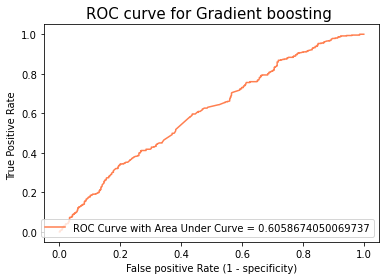

In [252]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient boosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [253]:
performance_metrics_with_hyperparameters['Gradient boosting']=[accuracy_score(y_test,gb_pred),
                                                                    precision_score(y_test,gb_pred),
                                                                    recall_score(y_test,gb_pred),
                                                                    f1_score(y_test,gb_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [254]:
h_params={'n_estimators':[10,20,30,50,70],
        'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,2,5],
        'algorithm' : ['SAMME', 'SAMME.R']}

In [255]:
rscv=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,response)

In [256]:
results.best_params_

{'n_estimators': 50, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}

In [257]:
results.best_score_

0.5679142991836835

# Adaboost with Hyperparameters

In [258]:
ada_tuned_model=results.best_estimator_
ada_tuned_model.fit(x_train,y_train)
ad_pred=ada_tuned_model.predict(x_test)
y_preds=ada_tuned_model.predict_proba(x_test)[:,1]

In [259]:
confusion_matrix(y_test,ad_pred)

array([[204, 309],
       [122, 349]], dtype=int64)

In [260]:
print(classification_report(y_test,ad_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,ad_pred))
print('Precission : ',precision_score(y_test,ad_pred))
print('Recall : ',recall_score(y_test,ad_pred))
print('f1-score : ',f1_score(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49       513
           1       0.53      0.74      0.62       471

    accuracy                           0.56       984
   macro avg       0.58      0.57      0.55       984
weighted avg       0.58      0.56      0.55       984


Accuracy is :  0.5619918699186992
Precission :  0.5303951367781155
Recall :  0.7409766454352441
f1-score :  0.6182462356067315


In [261]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6088741551921796


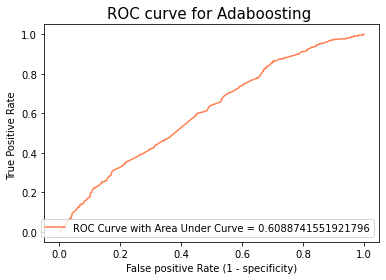

In [262]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [263]:
performance_metrics_with_hyperparameters['Adaboost']=[accuracy_score(y_test,ad_pred),
                                                                    precision_score(y_test,ad_pred),
                                                                    recall_score(y_test,ad_pred),
                                                                    f1_score(y_test,ad_pred),
                                                                    auc(fpr, tpr)]

# Performance metrics with hyperparameters

In [264]:
.,kvdperformance_metrics_with_hyperparameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting,Adaboost
Accuracy,0.557927,0.561992,0.523374,0.489837,0.587398,0.556911,0.561992
Precision,0.526706,0.525907,0.501992,0.471028,0.552504,0.526799,0.530395
Recall,0.753715,0.861996,0.535032,0.535032,0.726115,0.730361,0.740977
F1_score,0.620087,0.653258,0.517986,0.500994,0.627523,0.612100,0.618246
AUC,0.594856,0.571874,0.523870,0.497037,0.606087,0.605867,0.608874


In [265]:
print('Logistic Regression Model Accuracy : ', accuracy_score(y_test,lg_pred))
print('SVM Model Accuracy : ', accuracy_score(y_test,sv_pred))
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_test,kn_pred))
print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_test,dt_pred))
print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_test,rf_pred))
print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_test,gb_pred))
print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_test,ad_pred))

Logistic Regression Model Accuracy :  0.5579268292682927
SVM Model Accuracy :  0.5619918699186992
KNeighborsClassifier Model Accuracy :  0.5233739837398373
DecisionTreeClassifier Model Accuracy :  0.4898373983739837
RandomForestClassifier Model Accuracy :  0.5873983739837398
GradientBoostingClassifier Model Accuracy :  0.556910569105691
AdaBoostClassifier Model Accuracy :  0.5619918699186992


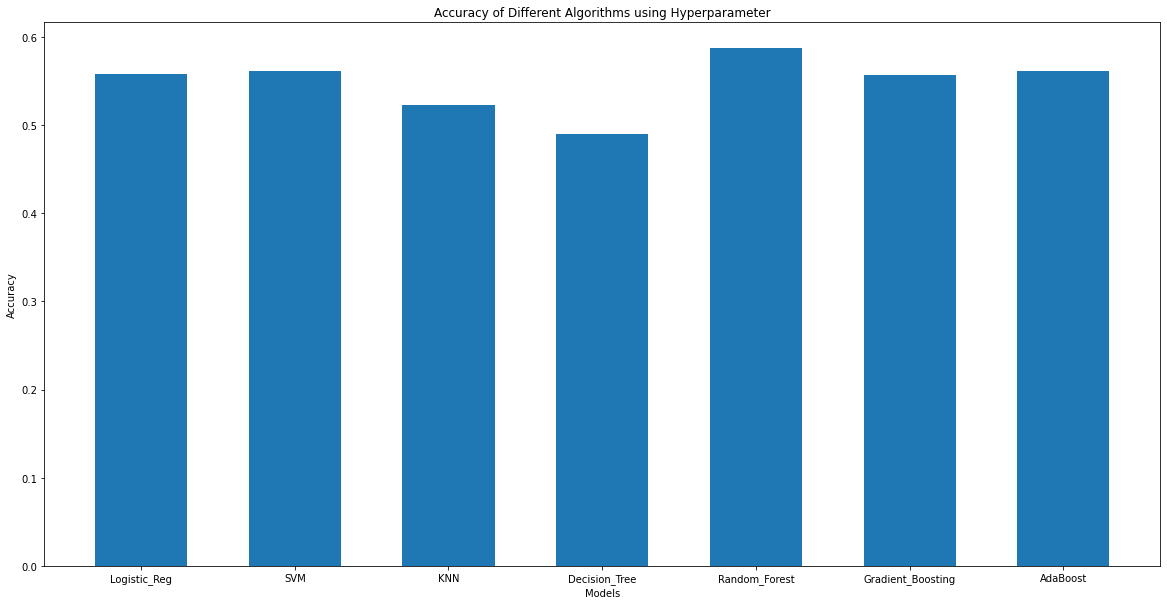

In [266]:
x = np.array(["Logistic_Reg","SVM", "KNN", "Decision_Tree", "Random_Forest", "Gradient_Boosting", "AdaBoost"])
y = np.array([0.5579,0.5619,0.5233,0.4898,0.5873,0.5569,0.5619])
width = 0.6
plt.figure(figsize=[20,10])
plt.bar(x,y,width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms using Hyperparameter')
plt.show()

# Some conclusion 
Here we conclude that all the models having good accuracy instead of Decision_Tree.<br>
Reco_Policy_Cat, Holding_Policy_Type are most imported features.<br>
If Holding_Policy_Type is of type 1 or 3, then they have more chances of cross selling insurance.<br>
If Holding policy duration in in bet 1, 2, 4 or more than 14 years then we have more chance to cross sell.